In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# data preparation
df = pd.read_csv('restaurant_data.csv')

df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
df.shape

(8368, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [5]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [6]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [7]:
# data cleaning
# drop nan
df.dropna(inplace=True)

# drop duplicate
df.drop_duplicates(inplace=True)

# set name as index
df.set_index('Name')

# Convert 'Parking Availability' to boolean
df['Parking Availability'] = df['Parking Availability'].map({'Yes': True, 'No': False})

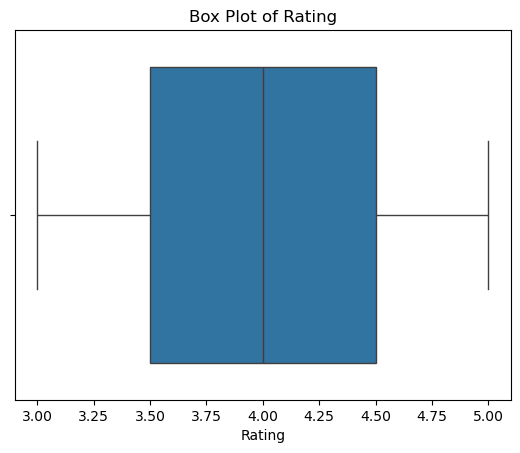

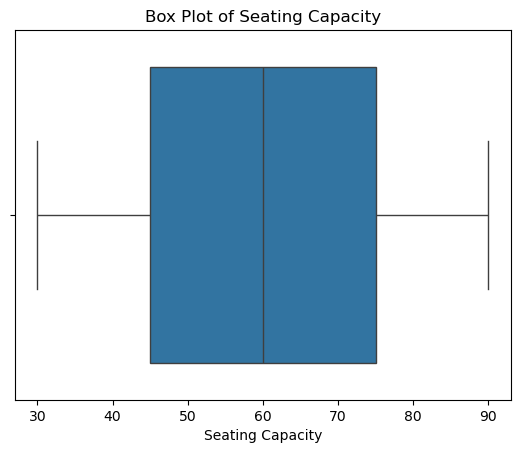

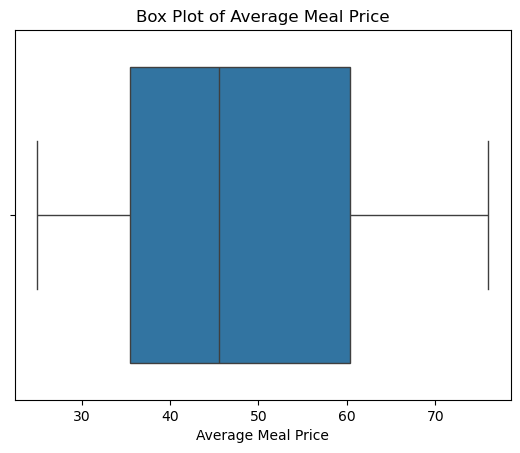

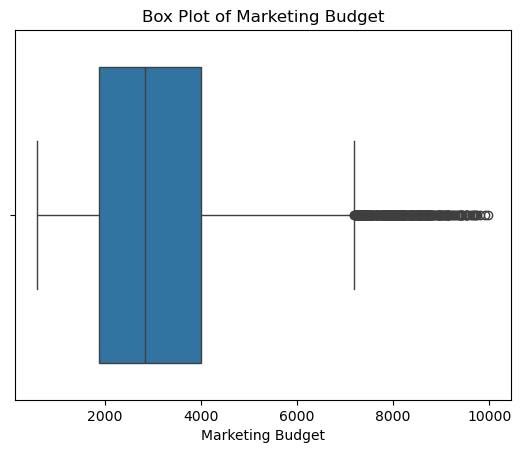

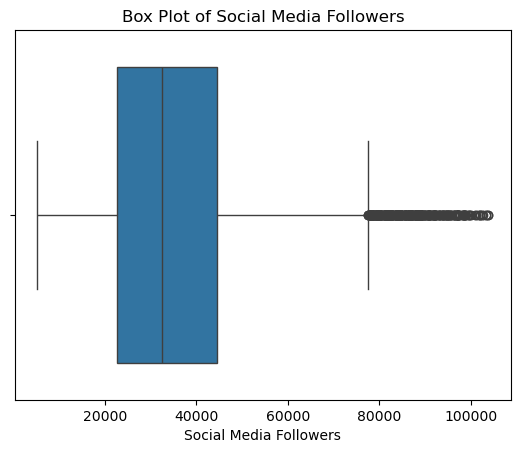

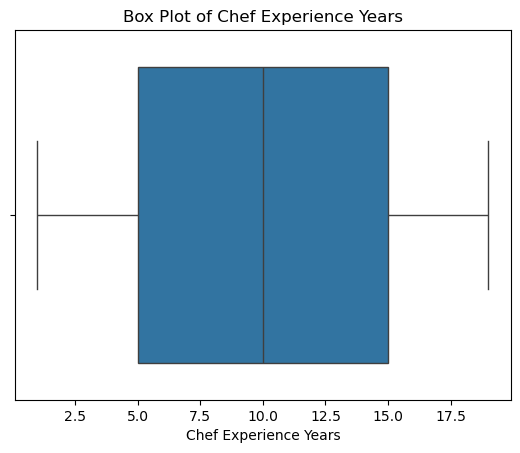

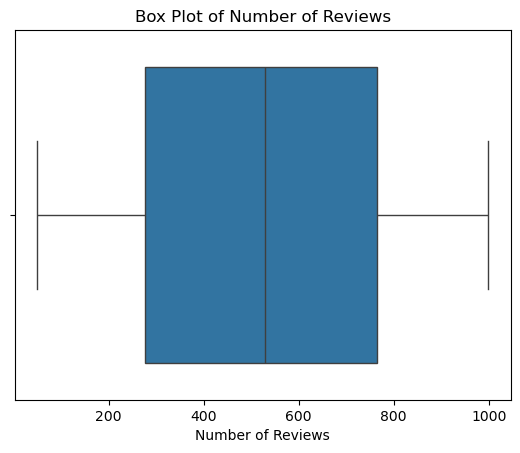

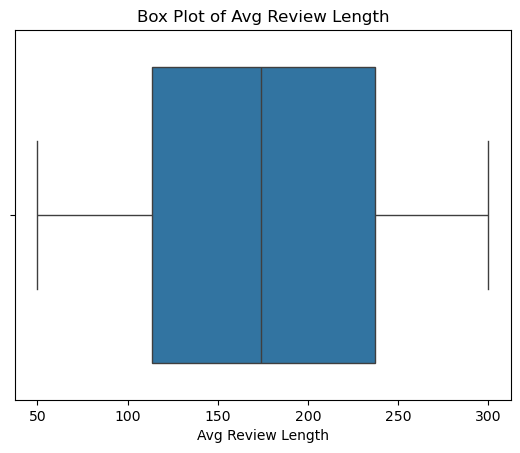

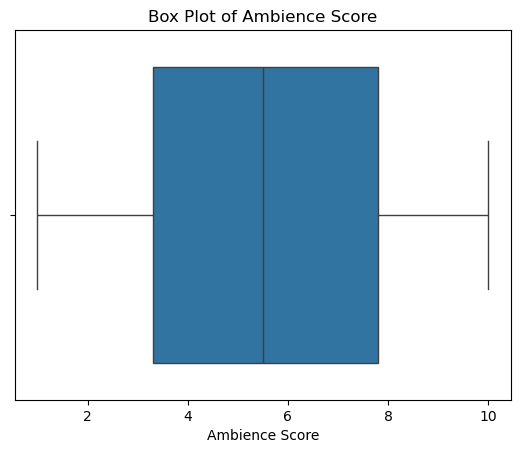

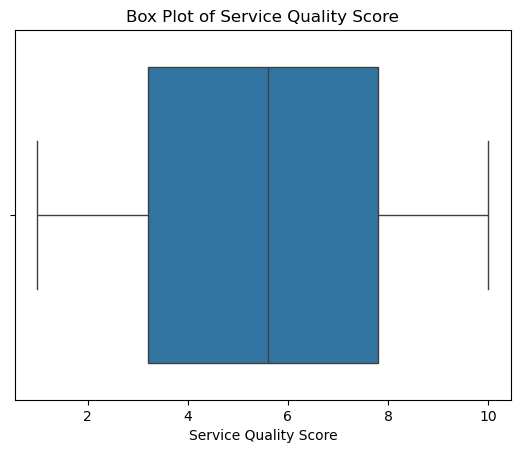

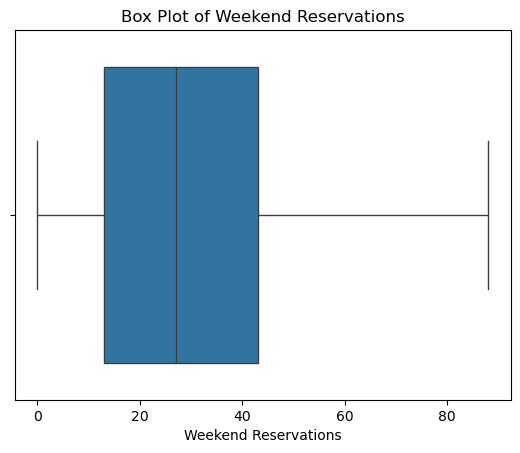

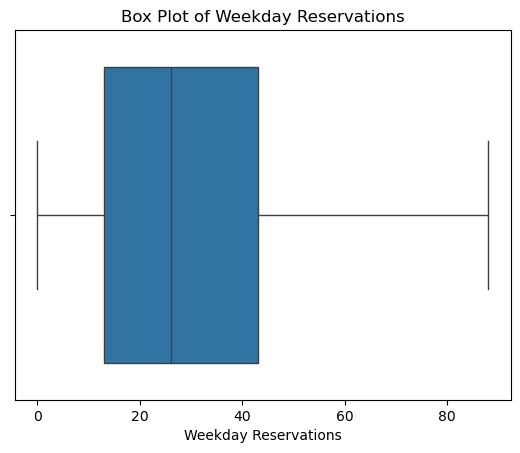

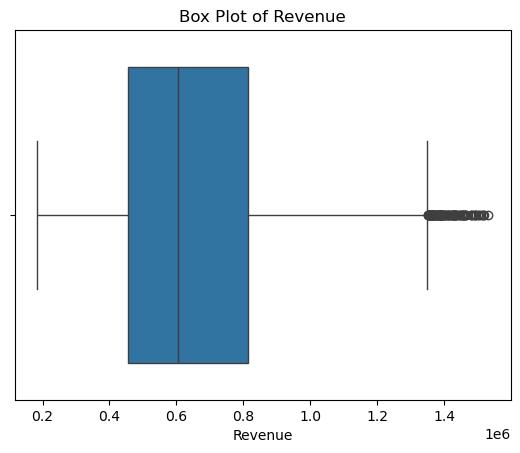

In [8]:
# identify outliers
# Box plot untuk memvisualisasikan outliers untuk semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Revenue'] < lower_bound) | (df['Revenue'] > upper_bound)]
print("Outliers detected:")
print(outliers)

Outliers detected:
                 Name  Location   Cuisine  Rating  Seating Capacity  \
4        Restaurant 4  Downtown  Japanese     4.9                88   
157    Restaurant 157  Downtown  Japanese     3.6                84   
167    Restaurant 167  Downtown  Japanese     4.1                85   
192    Restaurant 192  Downtown  Japanese     4.5                89   
259    Restaurant 259  Downtown  Japanese     4.3                86   
...               ...       ...       ...     ...               ...   
7788  Restaurant 7788  Downtown  Japanese     3.9                87   
7848  Restaurant 7848  Downtown  Japanese     3.0                86   
7936  Restaurant 7936  Downtown  Japanese     3.9                89   
7939  Restaurant 7939  Downtown  Japanese     3.1                87   
8121  Restaurant 8121  Downtown  Japanese     4.5                84   

      Average Meal Price  Marketing Budget  Social Media Followers  \
4                  75.98              3639                

In [10]:
# remove outliers from data
# Cap outliers
df['Revenue'] = df['Revenue'].clip(lower=lower_bound, upper=upper_bound)

# transform data
# Log transformation
df['Revenue'] = np.log1p(df['Revenue'])  # log1p handles zero values

<Figure size 1000x800 with 0 Axes>

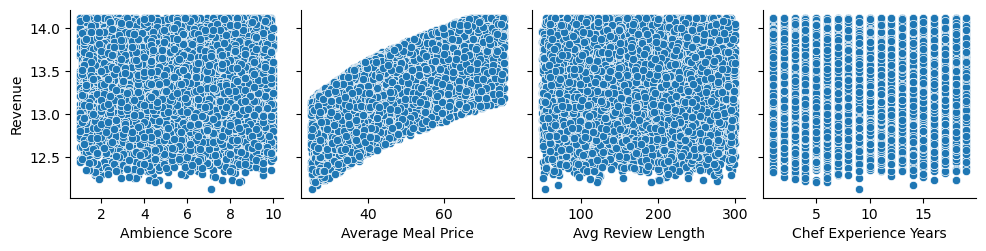

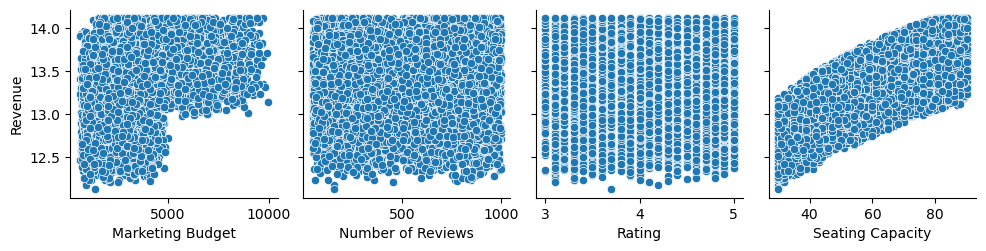

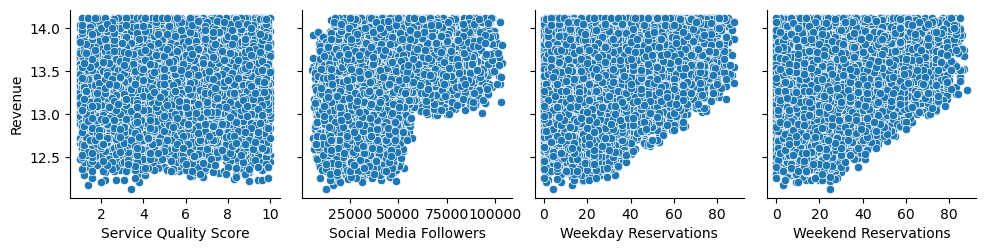

In [11]:
# Exploratory Data Analysis
# visualization
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
x_vars = numeric_cols.difference(['Revenue'])
y_vars = ['Revenue']

plt.figure(figsize=(10,8))
for i in range(0, len(x_vars), 4):
    sns.pairplot(df, x_vars=x_vars[i:i+4], y_vars=y_vars)
plt.show()

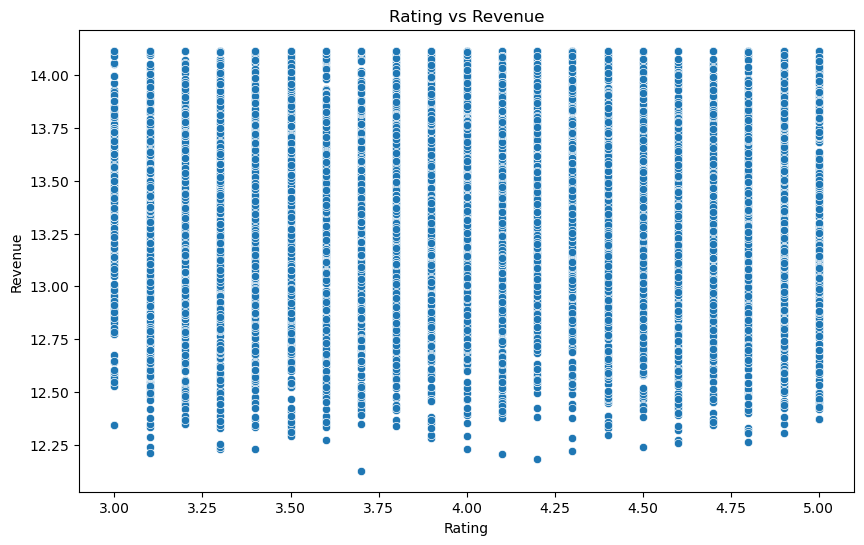

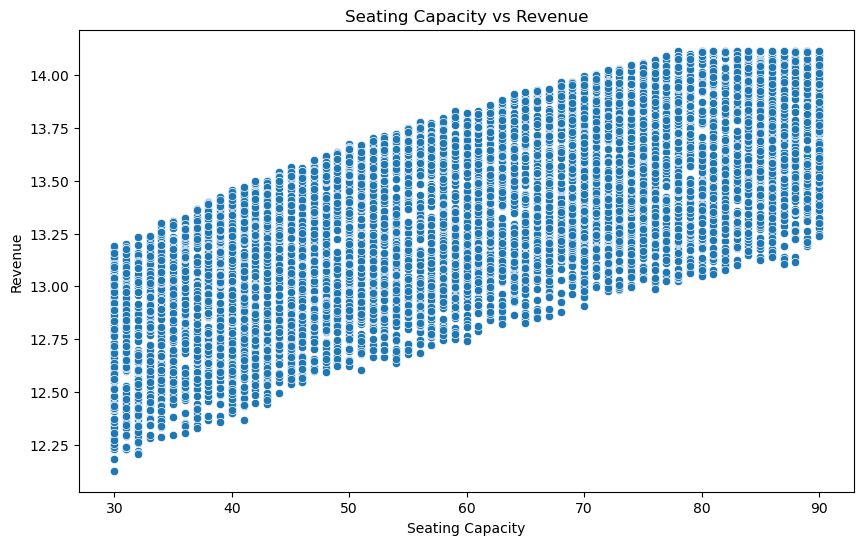

In [47]:
# Scatter plot for Rating vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Revenue', data=df)
plt.title('Rating vs Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

# Scatter plot for Seating Capacity vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seating Capacity', y='Revenue', data=df)
plt.title('Seating Capacity vs Revenue')
plt.xlabel('Seating Capacity')
plt.ylabel('Revenue')
plt.show()

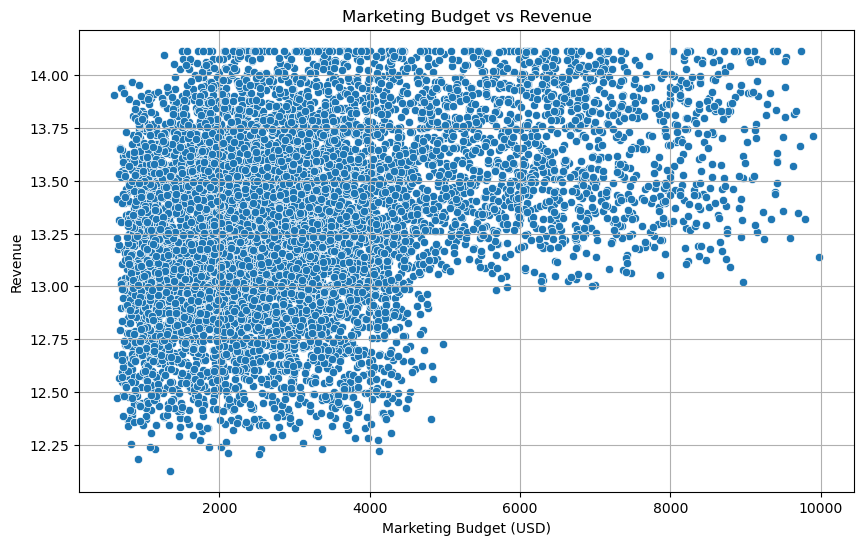

In [37]:
# Scatter plot for Marketing Budget vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing Budget', y='Revenue', data=df)
plt.title('Marketing Budget vs Revenue')
plt.xlabel('Marketing Budget (USD)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

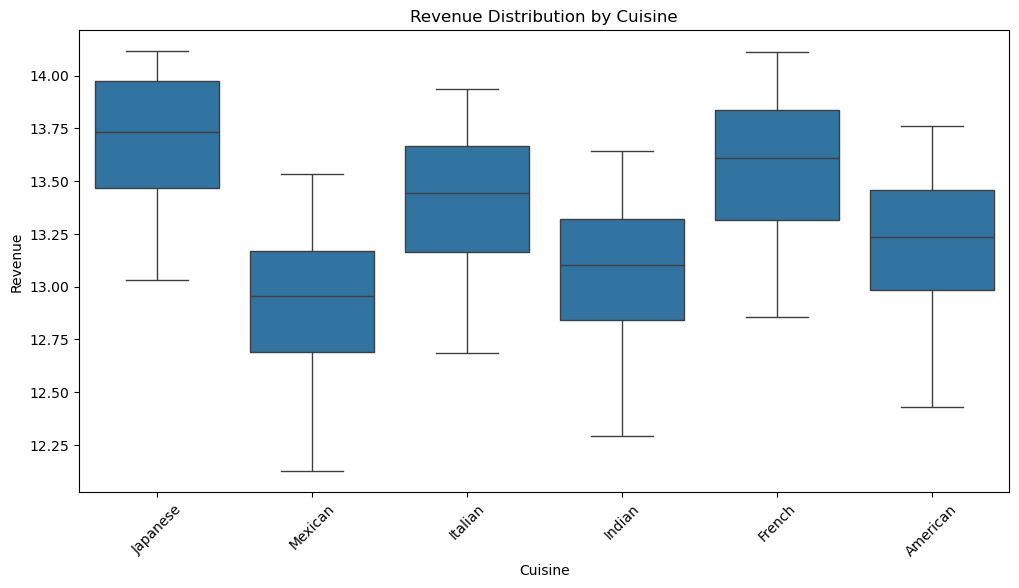

In [46]:
# Box plot for Revenue by Cuisine
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Revenue', data=df )
plt.title('Revenue Distribution by Cuisine')
plt.xticks(rotation=45)
plt.show()

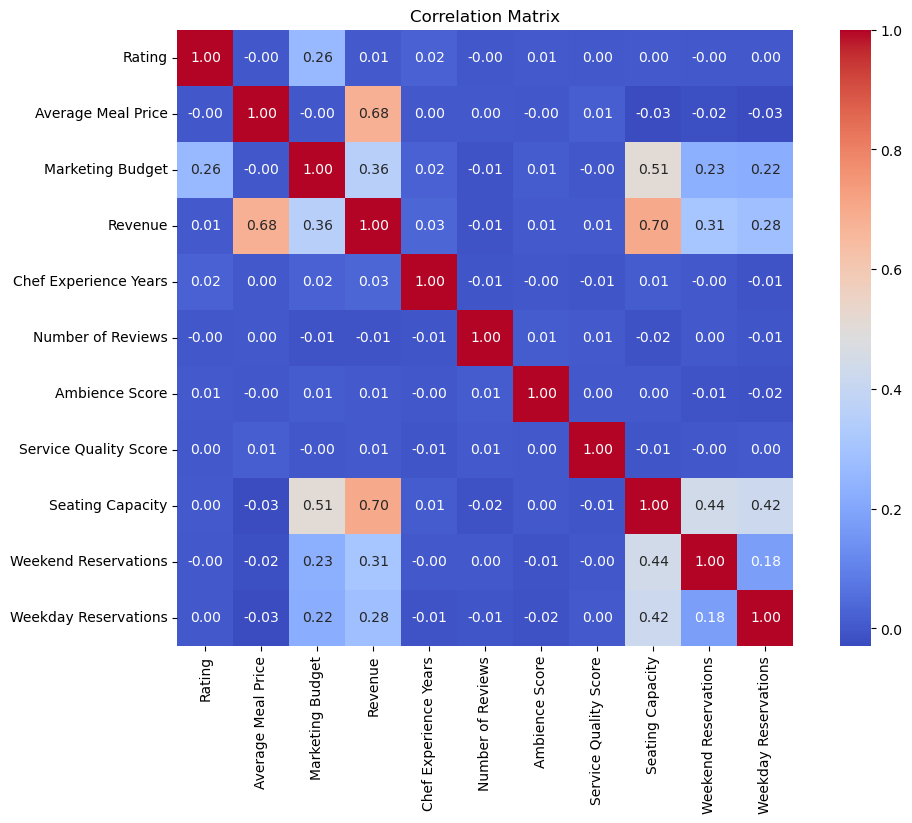

In [14]:
# correlation matrix
# Selecting relevant numerical columns for correlation
numerical_columns = ['Rating', 'Average Meal Price', 'Marketing Budget', 'Revenue', 
                     'Chef Experience Years', 'Number of Reviews', 'Ambience Score', 
                     'Service Quality Score', 'Seating Capacity', 'Weekend Reservations', 
                     'Weekday Reservations']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Correlation with Revenue
revenue_correlation = correlation_matrix['Revenue'].sort_values(ascending=False)
print("Correlation of features with Revenue:")
print(revenue_correlation)

Correlation of features with Revenue:
Revenue                  1.000000
Seating Capacity         0.700974
Average Meal Price       0.679007
Marketing Budget         0.356382
Weekend Reservations     0.306986
Weekday Reservations     0.284077
Chef Experience Years    0.034492
Ambience Score           0.007174
Rating                   0.006923
Service Quality Score    0.006764
Number of Reviews       -0.009956
Name: Revenue, dtype: float64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   bool   
 14  Weekend Reservations    8368 non-null   

In [17]:
# model selection for predict revenue
# preprocess data
# Define column types for your restaurant dataset
categorical_cols = ['Location', 'Cuisine']  # Categorical features
numerical_cols = ['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations']  # Numerical features
boolean_cols = ['Parking Availability']  # Boolean features

# DataFrame and 'Revenue' is the target variable
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']  # Target variable

# split data
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define your preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('bool', 'passthrough', boolean_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [19]:
# Initialize list to collect results
results = []

# Function to evaluate models and store results for visualization
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")
    
    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

In [20]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

In [21]:
# Iterate over the models to evaluate each
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

Linear Regression Model:
Test R²: 0.9918
Test RMSE: 0.0373



Random Forest Model:
Test R²: 0.9991
Test RMSE: 0.0127

Decision Tree Model:
Test R²: 0.9961
Test RMSE: 0.0259

Gradient Boosting Model:
Test R²: 0.9987
Test RMSE: 0.0147



In [22]:
# Define parameter grids for each model
param_grids = {
    'Linear Regression': {
        # No hyperparameters to tune
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_features': ['sqrt', 'log2'],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
}

# Initialize list to collect results
tuning_results = []

# Function to evaluate models with hyperparameter tuning
def evaluate_model_with_tuning(model_name, model, param_grid):
    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        error_score='raise'  # Raise errors for debugging
    )
    
    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = random_search.predict(X_test)
    
    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print results
    print(f"{model_name} Model with Hyperparameter Tuning:")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")
    
    # Append results to the list for visualization
    tuning_results.append({'Model': model_name, 'Best Params': random_search.best_params_, 'R²': test_r2, 'RMSE': test_rmse})


In [23]:
# Iterate over the models to evaluate each with hyperparameter tuning
for model_name, model in models.items():
    evaluate_model_with_tuning(model_name, model, param_grids[model_name])

# Convert results to a DataFrame
tuning_results_df = pd.DataFrame(tuning_results)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression Model with Hyperparameter Tuning:
Best parameters: {}
Test R²: 0.9918
Test RMSE: 0.0373

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Model with Hyperparameter Tuning:
Best parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 20}
Test R²: 0.9883
Test RMSE: 0.0447

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Model with Hyperparameter Tuning:
Best parameters: {'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 30}
Test R²: 0.9967
Test RMSE: 0.0238

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Model with Hyperparameter Tuning:
Best parameters: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 7, 'model__learning_rate': 0.1}
Test R²: 0.9996
Test RMSE: 0.0086



In [24]:
# selected best model Gradient Boosting Regressor
# Best parameters
best_params = {
    'n_estimators': 200,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'ma x_depth': 7,
    'learning_rate': 0.1
}

# Create a pipeline with the best parameters
best_model = GradientBoostingRegressor(**best_params)

# Fit the model on the entire training data
pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

pipeline_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Rating', 'Seating Capacity',
                                                   'Average Meal Price',
                                                   'Marketing Budget',
                                                   'Social Media Followers',
                                                   'Chef Experience Years',
                                                   'Number of Reviews',
                                                   'Avg Review Length',
                                                   'Ambience Score',
                                                   'Service Quality Score',
                                                   'Weekend Reservations',
                                                   'Weekday Reservations']),
                                                 ('bool', 'passthrough',
                                                  ['Parking Availability']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Location', 'Cuisine'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=7, min_samples_leaf=2,
                                           min_samples_split=10,
                                           n_estimators=200))])

In [25]:
# Make predictions
y_pred = pipeline_best.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0066


In [26]:
# Perform cross-validation
cv_scores = cross_val_score(pipeline_best, X, y, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for MSE
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R²: {cv_scores.mean():.4f}')

Cross-Validation R² Scores: [0.99957671 0.99948458 0.99953747 0.99953129 0.99952846]
Mean Cross-Validation R²: 0.9995


In [27]:
# Get feature importances
feature_importances = pipeline_best.named_steps['model'].feature_importances_

# Get feature names from the preprocessor
feature_names = pipeline_best.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

                        Feature    Importance
1         num__Seating Capacity  5.067459e-01
2       num__Average Meal Price  4.899027e-01
13       cat__Location_Downtown  1.327321e-03
15       cat__Location_Suburban  9.448978e-04
5    num__Chef Experience Years  5.989167e-04
14          cat__Location_Rural  9.032723e-05
3         num__Marketing Budget  8.255236e-05
17          cat__Cuisine_French  8.246627e-05
4   num__Social Media Followers  7.069339e-05
8           num__Ambience Score  4.535940e-05
9    num__Service Quality Score  3.160968e-05
10    num__Weekend Reservations  1.779845e-05
6        num__Number of Reviews  1.756863e-05
11    num__Weekday Reservations  1.738659e-05
7        num__Avg Review Length  1.277607e-05
0                   num__Rating  8.239149e-06
12   bool__Parking Availability  8.547248e-07
20        cat__Cuisine_Japanese  6.812460e-07
16        cat__Cuisine_American  6.676383e-07
18          cat__Cuisine_Indian  5.750229e-07
19         cat__Cuisine_Italian  5

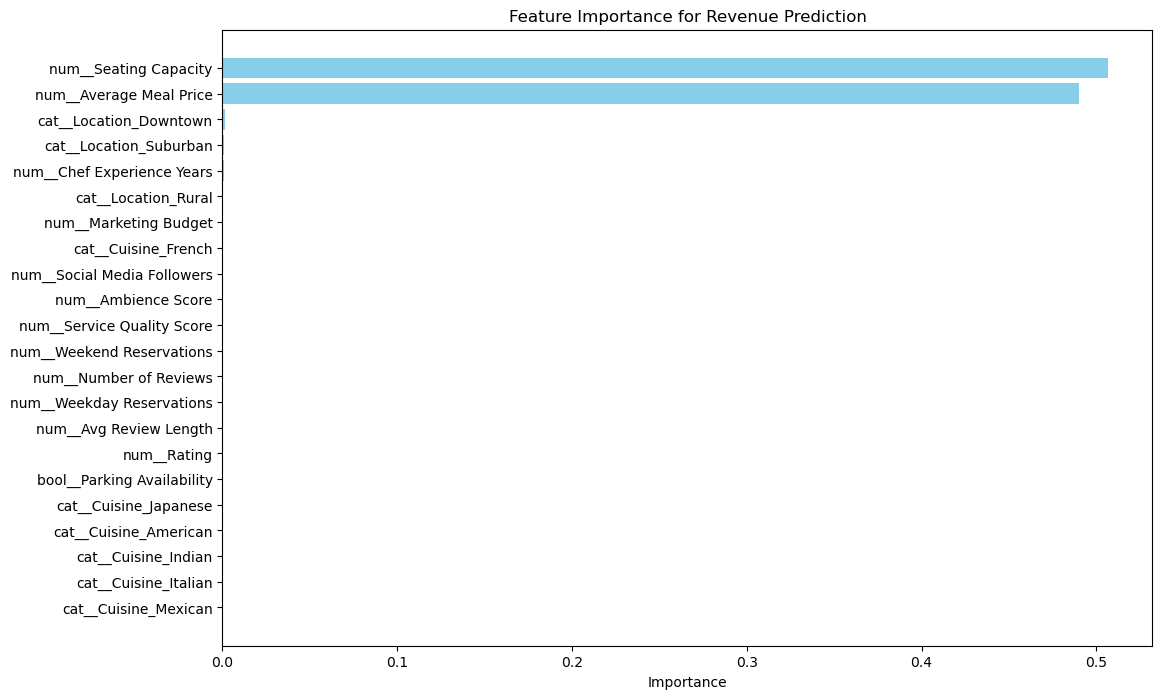

In [28]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Revenue Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [29]:
# Display the predictions alongside actual values
predictions_df = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': y_pred})
print(predictions_df.head())

      Actual Revenue  Predicted Revenue
2412       13.073025          13.079978
6832       12.613725          12.598540
5154       13.033371          13.018632
7081       13.757586          13.764572
6601       13.178334          13.170538


In [30]:
# Make predictions on new data
new_predictions = pipeline_best.predict(df)

# Display the predictions
print(f'Predicted Revenue for New Data: {new_predictions}')

Predicted Revenue for New Data: [13.36627828 13.09690636 13.19990494 ... 13.7402683  12.65722709
 13.18610847]


In [31]:
# Add predictions to the original DataFrame
df['Predicted Revenue'] = new_predictions

# Display the predictions
df[['Name', 'Revenue' ,'Predicted Revenue']] # Adjust columns as needed

,Name,Revenue,Predicted Revenue
0,Restaurant 0,13.367576,13.366278
1,Restaurant 1,13.102587,13.096906
2,Restaurant 2,13.201858,13.199905
3,Restaurant 3,12.910550,12.912485
4,Restaurant 4,14.116178,14.116403
...,...,...,...
8363,Restaurant 8363,12.982307,12.985267
8364,Restaurant 8364,12.935983,12.937470
8365,Restaurant 8365,13.743367,13.740268
8366,Restaurant 8366,12.649137,12.657227


In [32]:
# a. Summary of Insights
# Feature Importance: Highlight which features were most influential in predicting restaurant revenue. For example, you might find that Rating, Seating Capacity, and Marketing Budget are key predictors.
# Model Performance: Summarize the performance metrics of the models you evaluated:
# Gradient Boosting: R² = 0.9996, RMSE = 0.0086 (best performance).
# Random Forest: R² = 0.9885, RMSE = 0.0443.
# Decision Tree: R² = 0.9967, RMSE = 0.0238.
# Linear Regression: R² = 0.9918, RMSE = 0.0373.

# b. Recommendations
# Model Selection: Recommend using the Gradient Boosting model for revenue predictions due to its superior performance.
# Business Implications: Discuss how restaurant owners can leverage these insights to optimize their marketing strategies, seating arrangements, and menu pricing.


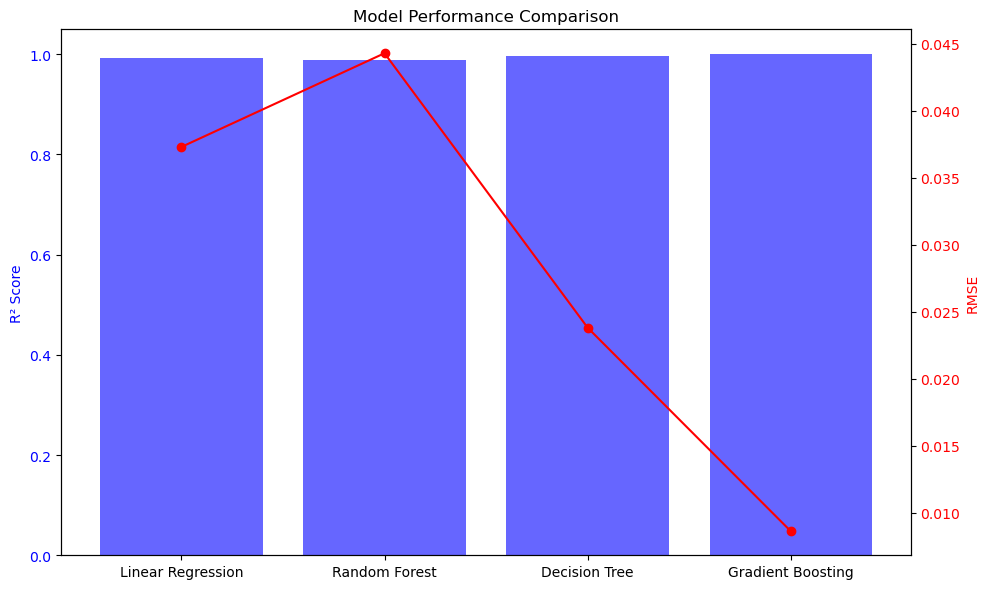

In [33]:
# Data for visualization
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
r2_scores = [0.9918, 0.9885, 0.9967, 0.9996]
rmse_scores = [0.0373, 0.0443, 0.0238, 0.0086]

# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R² scores
ax1.bar(models, r2_scores, color='b', alpha=0.6, label='R² Score')
ax1.set_ylabel('R² Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for RMSE
ax2 = ax1.twinx()
ax2.plot(models, rmse_scores, color='r', marker='o', label='RMSE')
ax2.set_ylabel('RMSE', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Model Performance Comparison')
fig.tight_layout()
plt.show()